<a href="https://colab.research.google.com/github/DANCAR1969/programacion/blob/master/tensorkeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Deep learnig mediante la clasificación de Imágenes con Fashion MNIST usando TensorFlow**


El código entrena un modelo de redes neuronales con TensorFlow para clasificar imágenes del conjunto de datos Fashion MNIST. El flujo incluye carga y preprocesamiento de datos, definición y entrenamiento del modelo, evaluación del rendimiento y visualización de resultados.

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


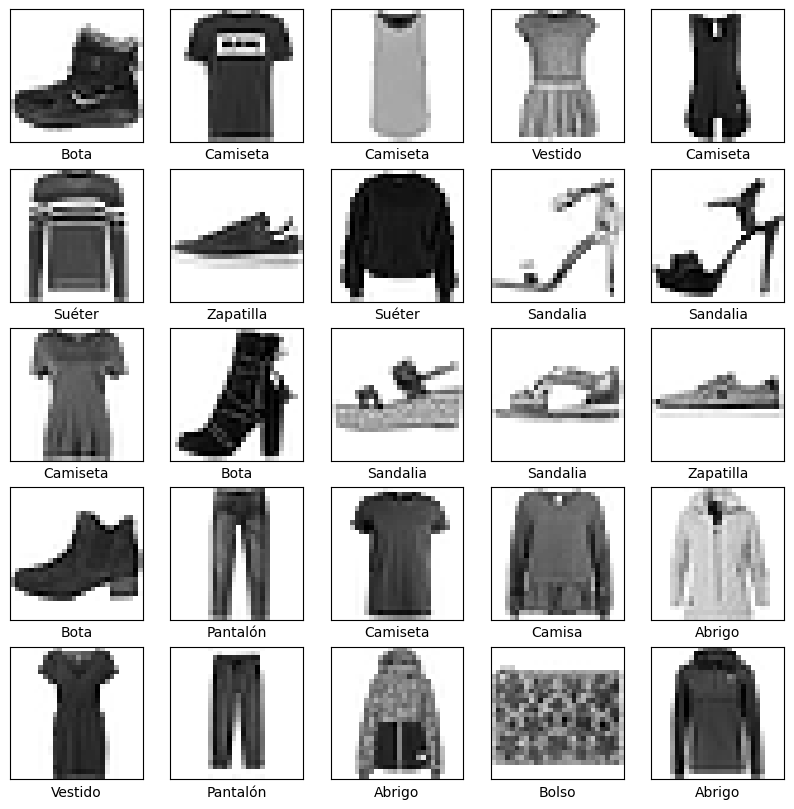

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7817 - loss: 0.6349
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8625 - loss: 0.3828
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.8763 - loss: 0.3416
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.8860 - loss: 0.3118
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8909 - loss: 0.2930
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8963 - loss: 0.2815
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9037 - loss: 0.2624
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9032 - loss: 0.2581
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9087 - loss: 0.2442
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9102 - loss: 0.2415
313/313 - 1s - 2ms/step - accuracy: 0.8758 - loss: 0.3526
Precisión en el conjunto de prueba: 87.58%
313/313 ━━━━━━

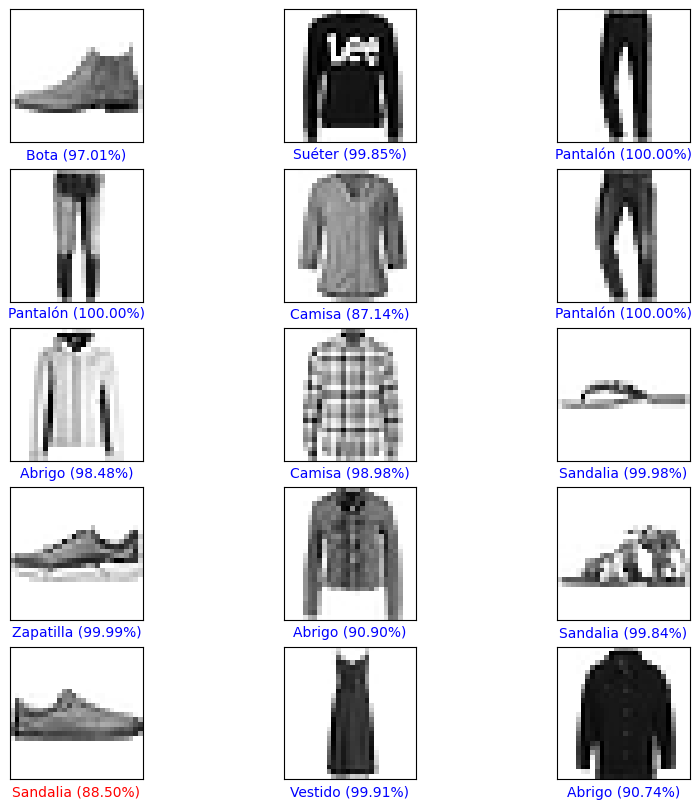

In [ ]:
#Importar las bibliotecas necesarias
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt # type: ignore

# Cargar el conjunto de datos de Fashion MNIST
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Clases de etiquetas
class_names = ['Camiseta', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo', 'Sandalia', 'Camisa', 'Zapatilla', 'Bolso', 'Bota']

# Preprocesar las imágenes
train_images = train_images / 255.0
test_images = test_images / 255.0

# Visualizar algunas imágenes
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Definir el modelo
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Aplanar las imágenes
    keras.layers.Dense(128, activation='relu'),   # Capa oculta con 128 neuronas
    keras.layers.Dense(10, activation='softmax') # Capa de salida con 10 neuronas
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
model.fit(train_images, train_labels, epochs=10)

# Evaluar el modelo
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Precisión en el conjunto de prueba: {test_acc * 100:.2f}%')

# Hacer predicciones
predictions = model.predict(test_images)

# Mostrar una predicción
def plot_image(i, predictions_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel(f"{class_names[predicted_label]} ({100 * np.max(predictions_array):.2f}%)", color=color)

# Mostrar algunos resultados
plt.figure(figsize=(10, 10))
for i in range(15):
    plt.subplot(5, 3, i+1)
    plot_image(i, predictions[i], test_labels[i], test_images[i])
plt.show()


Fases del Código y Explicación Detallada

1. Importación de Bibliotecas

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt  # type: ignore


Explicación:

tensorflow y keras: Para crear y entrenar el modelo de red neuronal.
numpy: Para operaciones matemáticas y manipulación de matrices.
matplotlib.pyplot: Para visualización de imágenes y resultados.

2. Carga del Conjunto de Datos Fashion MNIST

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


Explicación:

Carga el conjunto de datos Fashion MNIST, que contiene imágenes en escala de grises de 28x28 píxeles con etiquetas de 10 categorías de ropa y accesorios.
train_images, train_labels: Datos de entrenamiento y sus etiquetas.
test_images, test_labels: Datos de prueba y sus etiquetas.

3. Definición de Etiquetas de Clases

In [ ]:
class_names = ['Camiseta', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo',
               'Sandalia', 'Camisa', 'Zapatilla', 'Bolso', 'Bota']


Explicación:

Define las etiquetas de las clases para hacer los resultados más legibles.

4. Preprocesamiento de Imágenes

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0


Explicación:

Normaliza los valores de píxeles entre 0 y 1 dividiendo entre 255, mejorando el rendimiento del modelo.

5. Visualización de Imágenes de Entrenamiento

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


Explicación:

Visualiza las primeras 25 imágenes de entrenamiento con sus etiquetas correspondientes para verificar la carga correcta de los datos.

6. Definición del Modelo

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Aplanar las imágenes
    keras.layers.Dense(128, activation='relu'),   # Capa oculta con 128 neuronas
    keras.layers.Dense(10, activation='softmax') # Capa de salida con 10 neuronas
])


Explicación:

Flatten: Aplana cada imagen de 28x28 a un vector de 784 elementos.
Dense(128, activation='relu'): Crea una capa totalmente conectada con 128 neuronas y la función de activación ReLU.
Dense(10, activation='softmax'): Capa de salida con 10 neuronas, una para cada clase, y activación Softmax para obtener probabilidades.

7. Compilación del Modelo

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Explicación:

optimizer='adam': Optimizador para ajustar los pesos del modelo.
loss='sparse_categorical_crossentropy': Función de pérdida para problemas de clasificación multiclase.
metrics=['accuracy']: Métrica para evaluar el rendimiento.

8. Entrenamiento del Modelo

In [ ]:
model.fit(train_images, train_labels, epochs=10)


Explicación:

Entrena el modelo usando los datos de entrenamiento durante 10 épocas para mejorar su precisión.

9. Evaluación del Modelo

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Precisión en el conjunto de prueba: {test_acc * 100:.2f}%')


Explicación:

Evalúa el modelo usando los datos de prueba y muestra la precisión resultante.

10. Predicciones

In [ ]:
predictions = model.predict(test_images)


Explicación:

Genera predicciones para el conjunto de datos de prueba usando el modelo entrenado.

11. Visualización de Predicciones

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel(f"{class_names[predicted_label]} ({100 * np.max(predictions_array):.2f}%)", color=color)


Explicación:

Función personalizada para mostrar imágenes y sus predicciones con etiquetas de colores:
Azul: Predicción correcta.
Rojo: Predicción incorrecta.

12. Visualización de Resultados

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(15):
    plt.subplot(5, 3, i+1)
    plot_image(i, predictions[i], test_labels[i], test_images[i])
plt.show()


Explicación:

Visualiza 15 imágenes de prueba con las predicciones del modelo, mostrando la probabilidad y el color según la precisión.
Resumen Final
El código sigue un flujo completo de aprendizaje profundo que incluye:

Carga y Preprocesamiento de Datos: Normaliza imágenes y define etiquetas.
Visualización de Datos: Muestra ejemplos del conjunto de entrenamiento.
Definición y Entrenamiento del Modelo: Usa TensorFlow para crear, compilar y entrenar una red neuronal.
Evaluación y Predicción: Evalúa el modelo y genera predicciones con una visualización clara de los resultados.